In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
X = pd.read_csv('logisticX.csv').values
y = pd.read_csv('logisticY.csv').values

In [26]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [27]:
X

array([[-0.70739532,  1.49166385],
       [-1.39759229,  2.13781242],
       [-1.14266896,  0.89423113],
       [-1.28516611,  0.64964747],
       [-0.72243081,  1.37364094],
       [-1.34916139, -0.51113841],
       [-0.64460893,  0.51210952],
       [-1.49566297, -0.74000959],
       [-0.4048722 ,  1.00716005],
       [-0.97644747,  0.71988725],
       [-2.40723674,  0.93570058],
       [-0.70580866,  0.39085801],
       [-0.13257118, -0.64358236],
       [ 0.10996109,  1.41496689],
       [-0.67656879,  0.22806531],
       [ 0.27248037,  0.82829614],
       [-0.32538811,  1.38397243],
       [ 0.74825162,  1.11169463],
       [-0.64891558,  0.10365696],
       [-0.48662296,  0.51189428],
       [-0.5197917 ,  0.54346272],
       [-0.42746322,  1.41288625],
       [-0.21938413,  1.62554274],
       [-0.04182936, -0.06559293],
       [-1.59894696, -0.03258956],
       [-1.83279037,  0.79306863],
       [ 0.16307641,  0.69793283],
       [-0.11730902,  0.84386512],
       [-1.49286742,

In [28]:
X = np.c_[np.ones((X.shape[0], 1)), X] 

In [29]:
X

array([[ 1.        , -0.70739532,  1.49166385],
       [ 1.        , -1.39759229,  2.13781242],
       [ 1.        , -1.14266896,  0.89423113],
       [ 1.        , -1.28516611,  0.64964747],
       [ 1.        , -0.72243081,  1.37364094],
       [ 1.        , -1.34916139, -0.51113841],
       [ 1.        , -0.64460893,  0.51210952],
       [ 1.        , -1.49566297, -0.74000959],
       [ 1.        , -0.4048722 ,  1.00716005],
       [ 1.        , -0.97644747,  0.71988725],
       [ 1.        , -2.40723674,  0.93570058],
       [ 1.        , -0.70580866,  0.39085801],
       [ 1.        , -0.13257118, -0.64358236],
       [ 1.        ,  0.10996109,  1.41496689],
       [ 1.        , -0.67656879,  0.22806531],
       [ 1.        ,  0.27248037,  0.82829614],
       [ 1.        , -0.32538811,  1.38397243],
       [ 1.        ,  0.74825162,  1.11169463],
       [ 1.        , -0.64891558,  0.10365696],
       [ 1.        , -0.48662296,  0.51189428],
       [ 1.        , -0.5197917 ,  0.543

In [ ]:
def sigmoid_func(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
def cost_compute(X, y, theta):
    m = len(y)
    h = sigmoid_func(X @ theta)
    return (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))

In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        gradient = (1/m) * (X.T @ (sigmoid_func(X @ theta) - y))
        theta -= alpha * gradient
        cost_history.append(cost_compute(X, y, theta))
    return theta, cost_history

In [33]:
theta = np.zeros((X.shape[1], 1))

In [34]:
theta

array([[0.],
       [0.],
       [0.]])

In [35]:
alpha = 0.1
iterations = 1000
theta_opt, cost_history_01 = gradient_descent(X, y, theta, alpha, iterations)

In [36]:
alpha2 = 5
theta_opt2, cost_history_5 = gradient_descent(X, y, theta, alpha2, iterations)

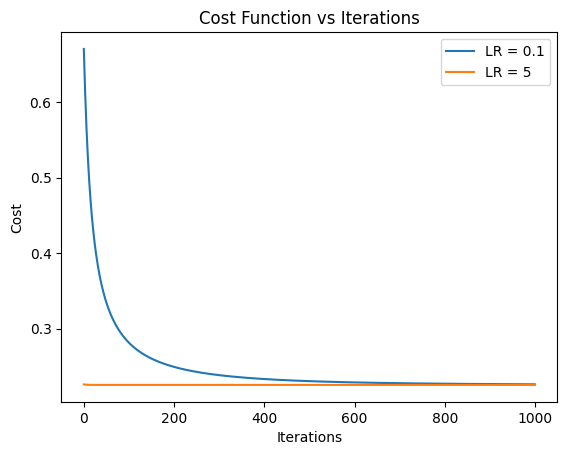

In [37]:
plt.plot(range(len(cost_history_01)), cost_history_01, label='LR = 0.1')
plt.plot(range(len(cost_history_5)), cost_history_5, label='LR = 5')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function vs Iterations')
plt.show()

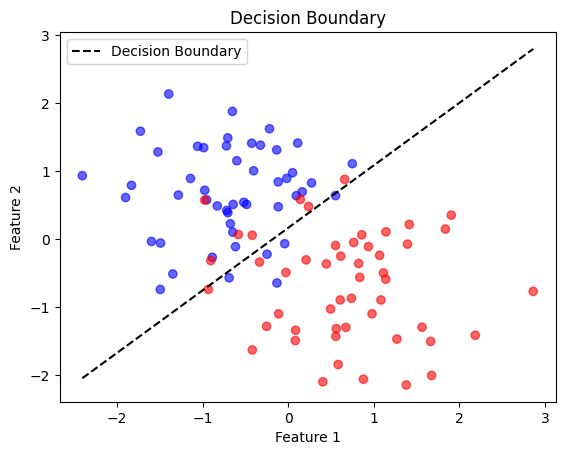

In [38]:
x_vals = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_vals = -(theta_opt[0] + theta_opt[1] * x_vals) / theta_opt[2]
plt.scatter(X[:, 1], X[:, 2], c=y.flatten(), cmap='bwr', alpha=0.6)
plt.plot(x_vals, y_vals, 'k--', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.show()

In [ ]:
y_pred = sigmoid_func(X @ theta_opt) >= 0.5

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)

In [41]:
print("Confusion Matrix:\n", cm)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
 [[44  5]
 [ 7 43]]
Accuracy: 0.8788
Precision: 0.8958
Recall: 0.8600
F1 Score: 0.8776
